In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:\\Users\\TenSaY\\Documents\\tradingpy\\data2.csv")


In [2]:
data.head()

,Local time,Open,High,Low,Close,Volume
0,01.05.2019 00:00:00.000 GMT+0100,1.12112,1.12158,1.12111,1.12157,2146.6499
1,01.05.2019 01:00:00.000 GMT+0100,1.12157,1.12183,1.12148,1.12182,2129.1899
2,01.05.2019 02:00:00.000 GMT+0100,1.12182,1.12185,1.12166,1.12173,2105.9800
3,01.05.2019 03:00:00.000 GMT+0100,1.12172,1.12177,1.12138,1.12152,2010.6801
4,01.05.2019 04:00:00.000 GMT+0100,1.12152,1.12196,1.12151,1.12184,3163.2700


In [3]:
indexzero=data[data["Volume"]==0].index


data.drop(indexzero,inplace=True)
data.loc[(data["Volume"]==0)]

,Local time,Open,High,Low,Close,Volume


In [4]:
data.isna().sum()

Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [5]:
import pandas_ta as ta 

In [6]:
data["ATR"]=data.ta.atr(lenght=20)
data["RSI"]=data.ta.rsi()
data["average"]=data.ta.midprice(lenght=1)
data["MA40"]=data.ta.sma(lenght=40)
data["MA80"]=data.ta.sma(lenght=80)
data["MA160"]=data.ta.sma(lenght=160)

In [7]:
data.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,average,MA40,MA80,MA160
30549,05.04.2024 17:00:00.000 GMT+0100,1.08401,1.08444,1.08331,1.08357,10922.86,0.001406,51.924084,1.083020,1.082896,1.082896,1.082896
30550,05.04.2024 18:00:00.000 GMT+0100,1.08359,1.08388,1.08314,1.08328,6276.33,0.001358,50.388401,1.083790,1.082833,1.082833,1.082833
30551,05.04.2024 19:00:00.000 GMT+0100,1.08328,1.08379,1.08306,1.08348,5454.43,0.001313,51.454742,1.083470,1.082806,1.082806,1.082806
30552,05.04.2024 20:00:00.000 GMT+0100,1.08348,1.08369,1.08320,1.08354,7699.30,0.001254,51.789523,1.083425,1.082772,1.082772,1.082772
30553,05.04.2024 21:00:00.000 GMT+0100,1.08354,1.08376,1.08337,1.08352,6422.56,0.001193,51.661630,1.083480,1.082779,1.082779,1.082779


In [8]:
from scipy.stats import linregress

In [9]:
def getslope(array):
    y=np.array(array)
    x=np.arange(len(y))
    slope=linregress(x,y)[0]
    return slope
    

In [17]:
backrollingN=6
data["slopeMA40"]=data["MA40"].rolling(window=backrollingN).apply(getslope,raw=True)
data["slopeMA80"]=data["MA80"].rolling(window=backrollingN).apply(getslope,raw=True)
data["slopeMA160"]=data["MA160"].rolling(window=backrollingN).apply(getslope,raw=True)
data["ASlope"]=data["average"].rolling(window=backrollingN).apply(getslope, raw=True)
data["RSISlope"]=data["RSI"].rolling(window=backrollingN).apply(getslope, raw=True)

In [11]:
data.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,ASlope,RSISlope
30549,05.04.2024 17:00:00.000 GMT+0100,1.08401,1.08444,1.08331,1.08357,10922.86,0.001406,51.924084,1.083020,1.082896,1.082896,1.082896,-0.000064,-0.000064,-0.000064,-0.000150,2.794389
30550,05.04.2024 18:00:00.000 GMT+0100,1.08359,1.08388,1.08314,1.08328,6276.33,0.001358,50.388401,1.083790,1.082833,1.082833,1.082833,-0.000017,-0.000017,-0.000017,0.000322,4.951381
30551,05.04.2024 19:00:00.000 GMT+0100,1.08328,1.08379,1.08306,1.08348,5454.43,0.001313,51.454742,1.083470,1.082806,1.082806,1.082806,0.000014,0.000014,0.000014,0.000494,3.861655
30552,05.04.2024 20:00:00.000 GMT+0100,1.08348,1.08369,1.08320,1.08354,7699.30,0.001254,51.789523,1.083425,1.082772,1.082772,1.082772,0.000004,0.000004,0.000004,0.000510,1.031794
30553,05.04.2024 21:00:00.000 GMT+0100,1.08354,1.08376,1.08337,1.08352,6422.56,0.001193,51.661630,1.083480,1.082779,1.082779,1.082779,-0.000020,-0.000020,-0.000020,0.000235,-0.359262


In [12]:
pipdiff=450*1e-5
SLTPRatio=2


In [13]:
def target(barsupfront,df):
    lenght=len(df)
    high=list(df["High"])
    low=list(df["Low"])
    close=list(df["Close"])
    open=list(df["Open"])
    trendcat=[None]*lenght
    for line in range (0,lenght-barsupfront-2):
        valueOpenLow=0
        valueOpenHigh=0
        for i in range(1,barsupfront+2):
            value_1=open[line+1]-low[line+i]
            value_2=open[line+1]-high[line+i]
            valueOpenLow=max(value_1,valueOpenLow)
            valueOpenHigh=min(value_2,valueOpenHigh)
            if ((valueOpenLow>=pipdiff)and(-valueOpenHigh<=(pipdiff/2))):
                trendcat[line]=1
                break
            elif ((valueOpenLow<=(pipdiff/2))and(-valueOpenHigh>=pipdiff)):
                trendcat[line]=2
                break
            else:
                  trendcat[line]=0
    return trendcat
        

In [26]:
data["taget"]=target(6,data)
data.head()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,ASlope,RSISlope,taget
0,01.05.2019 00:00:00.000 GMT+0100,1.12112,1.12158,1.12111,1.12157,2146.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,01.05.2019 01:00:00.000 GMT+0100,1.12157,1.12183,1.12148,1.12182,2129.1899,NaN,NaN,1.121470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,01.05.2019 02:00:00.000 GMT+0100,1.12182,1.12185,1.12166,1.12173,2105.9800,NaN,NaN,1.121665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,01.05.2019 03:00:00.000 GMT+0100,1.12172,1.12177,1.12138,1.12152,2010.6801,NaN,NaN,1.121615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,01.05.2019 04:00:00.000 GMT+0100,1.12152,1.12196,1.12151,1.12184,3163.2700,NaN,NaN,1.121670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


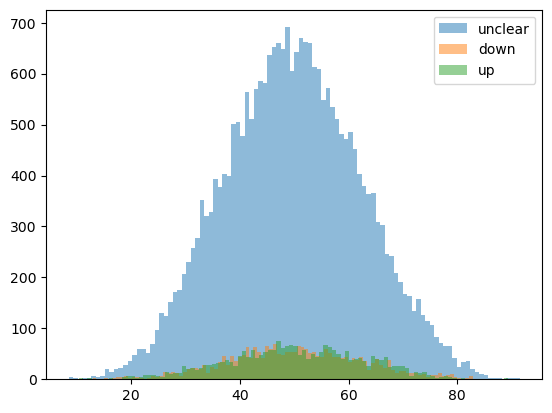

In [23]:
from matplotlib import pyplot
data_up=data.RSI[ data['taget'] == 2 ]
data_down=data.RSI[ data['taget'] == 1 ]
data_unclear=data.RSI[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

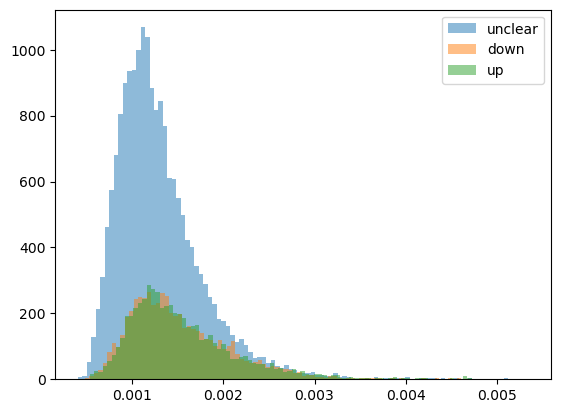

In [18]:
from matplotlib import pyplot
data_up=data.ATR[ data['taget'] == 2 ]
data_down=data.ATR[ data['taget'] == 1 ]
data_unclear=data.ATR[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

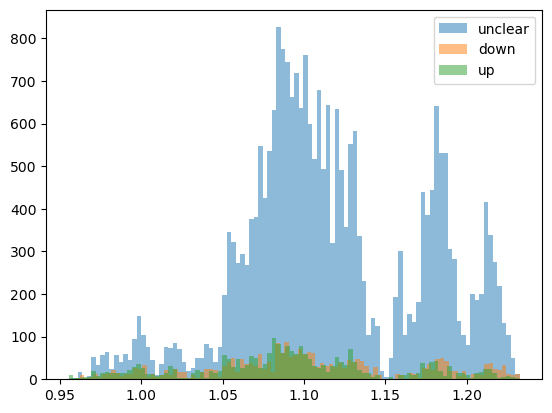

In [24]:
data_up=data.MA160[ data['taget'] == 2 ]
data_down=data.MA160[ data['taget'] == 1 ]
data_unclear=data.MA160[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

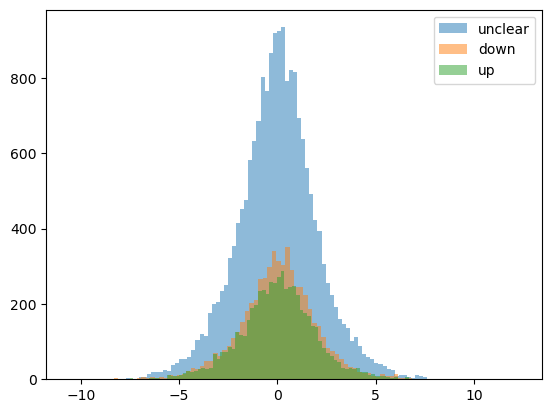

In [20]:
data_up=data.RSISlope[ data['taget'] == 2 ]
data_down=data.RSISlope[ data['taget'] == 1 ]
data_unclear=data.RSISlope[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()


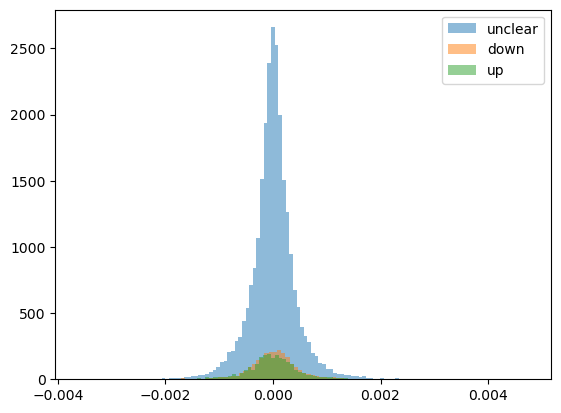

In [25]:
data_up=data.ASlope[ data['taget'] == 2 ]
data_down=data.ASlope[ data['taget'] == 1 ]
data_unclear=data.ASlope[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

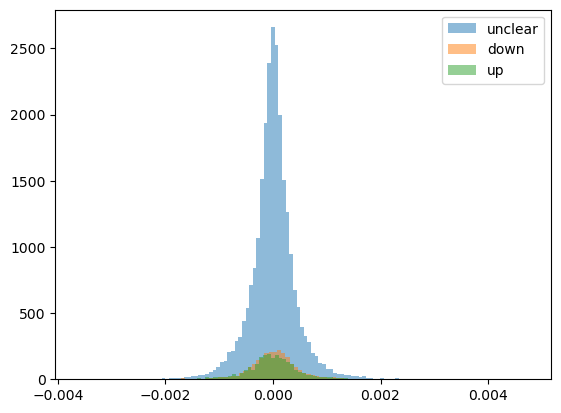

In [27]:
data_up=data.ASlope[ data['taget'] == 2 ]
data_down=data.ASlope[ data['taget'] == 1 ]
data_unclear=data.ASlope[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

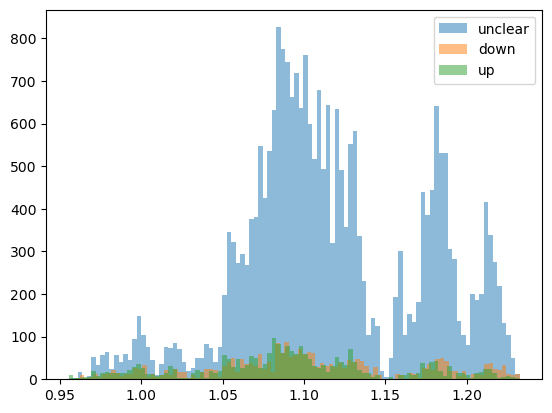

In [28]:
data_up=data.MA40[ data['taget'] == 2 ]
data_down=data.MA40[ data['taget'] == 1 ]
data_unclear=data.MA40[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

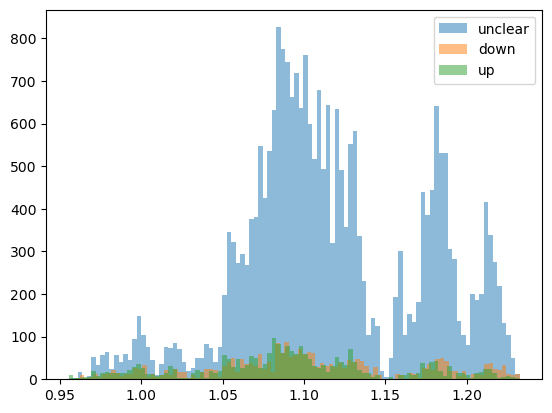

In [29]:
data_up=data.MA80[ data['taget'] == 2 ]
data_down=data.MA80[ data['taget'] == 1 ]
data_unclear=data.MA80[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

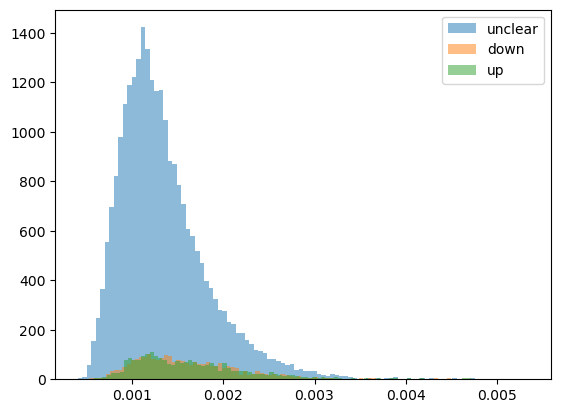

In [30]:
data_up=data.ATR[ data['taget'] == 2 ]
data_down=data.ATR[ data['taget'] == 1 ]
data_unclear=data.ATR[ data['taget'] == 0 ]
pyplot.hist(data_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(data_down, bins=100, alpha=0.5, label='down')
pyplot.hist(data_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()